In [1]:
import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import numpy as np
import pythiamill as pm

In [2]:
param_names = [
  "TimeShower:alphaSvalue",
  # "TimeShower:pTmin",
  # "TimeShower:pTminChgQ",

  # "StringPT:sigma",
  # "StringZ:bLund",
  # "StringZ:aExtraSQuark",
  # "StringZ:aExtraDiquark",
  # "StringZ:rFactC",
  # "StringZ:rFactB",

  "StringFlav:probStoUD",
  "StringFlav:probQQtoQ",
  "StringFlav:probSQtoQQ",
  "StringFlav:probQQ1toQQ0",
  "StringFlav:mesonUDvector",
  "StringFlav:mesonSvector",
  "StringFlav:mesonCvector",
  "StringFlav:mesonBvector",
  "StringFlav:etaSup",
  "StringFlav:etaPrimeSup",
  "StringFlav:decupletSup"
]

monash = np.array([
  0.1365,
  # 0.5,
  # 0.5,

  # 0.98,
  # 0.335,
  # 0,
  # 0.97,
  # 1.32,
  # 0.885,

  0.217,
  0.081,
  0.915,
  0.0275,
  0.6,
  0.12,
  1,
  0.5,
  0.55,
  0.88,
  2.2
])

In [3]:
options = pm.config.monash + pm.config.please_be_quiet + [
  '%s = %lf' % (k, v)
  for k, v in zip(param_names, monash)
]

In [4]:
detector = pm.utils.SphericalTracker(
  is_binary=False, photon_detection=True,
  pseudorapidity_steps=32, phi_steps=32,
  n_layers=1, R_min=1, R_max=1,
)

In [5]:
mill = pm.ParametrizedPythiaMill(
    detector_factory=detector,
    options=options,
    batch_size=1,
    n_workers=8,
    seed=111,
    log=None
)

In [6]:
def get_data(params, n_samples):
    params = np.array(params, dtype='float32')
    assert params.shape == (3, )
    
    for _ in range(n_samples):
        mill.request(params)
    
    results = []
    for _ in tqdm(range(n_samples)):
        ps, batch = mill.retrieve()
        batch = batch.reshape((batch.shape[0], 1, 32, 32))
        results.append(batch)
    
    return np.concatenate(results, axis=0)

In [7]:
offset = 0.25
X_ground_truth = get_data([0.0, 0.0, 0.0], 32 * 1024)
X_x = get_data([offset, 0.0, 0.0], 32 * 1024)
X_y = get_data([0.0, offset, 0.0], 32 * 1024)
X_z = get_data([0.0, 0.0, offset], 32 * 1024)

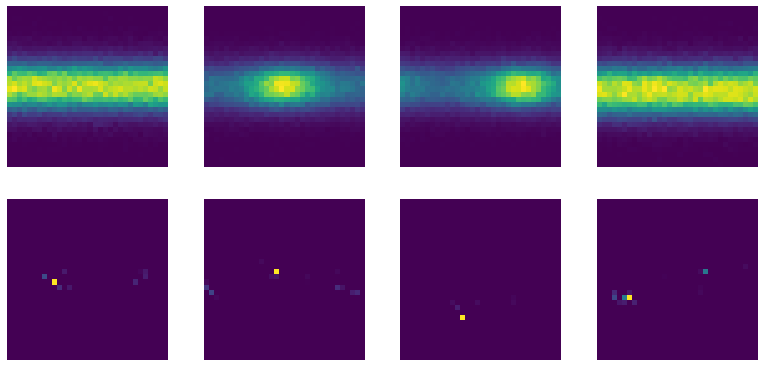

In [8]:
size = 3
space = 0.5
plt.subplots(nrows=2, ncols=4, figsize=(4 * size + 3 * space, 2 * size + space))

plt.subplot(2, 4, 1)
plt.axis('off')
plt.imshow(np.mean(X_ground_truth, axis=(0, 1)))

plt.subplot(2, 4, 2)
plt.axis('off')
plt.imshow(np.mean(X_x, axis=(0, 1)))

plt.subplot(2, 4, 3)
plt.axis('off')
plt.imshow(np.mean(X_y, axis=(0, 1)))

plt.subplot(2, 4, 4)
plt.axis('off')
plt.imshow(np.mean(X_z, axis=(0, 1)))

plt.subplot(2, 4, 5)
plt.axis('off')
plt.imshow(X_ground_truth[0, 0])

plt.subplot(2, 4, 6)
plt.axis('off')
plt.imshow(X_x[0, 0])

plt.subplot(2, 4, 7)
plt.axis('off')
plt.imshow(X_y[0, 0])

plt.subplot(2, 4, 8)
plt.axis('off')
plt.imshow(X_z[0, 0])